In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
df=pd.read_csv('Live.csv')

In [5]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [6]:
#data preprocessing
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [9]:
df.shape

(7050, 11)

In [10]:
df.value_counts(['status_type'])

status_type
photo          4288
video          2334
status          365
link             63
dtype: int64

In [11]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [12]:
numeric_columns = df.select_dtypes(include=['number']).columns

In [13]:
numeric_columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

<ipython-input-14-487026f79fb6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(),cmap='inferno')


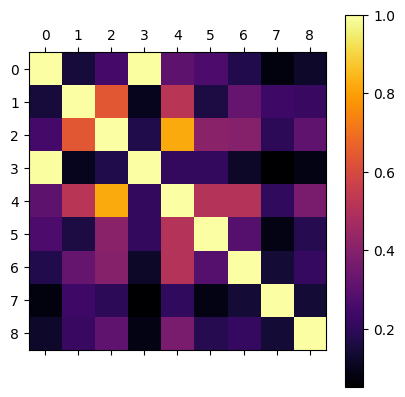

In [14]:
#correlation map
plt.matshow(df.corr(),cmap='inferno')
plt.colorbar()

In [15]:
X=df
y=df['status_type']

In [16]:
#encoder feature not number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [17]:
X['status_published'] = le.fit_transform(X['status_published'])

In [18]:
X

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,3949,529,512,262,432,92,3,1,1,0
1,1,3917,150,0,0,150,0,0,0,0,0
2,3,3921,227,236,57,204,21,1,1,0,0
3,1,3920,111,0,0,111,0,0,0,0,0
4,1,3832,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,6691,89,0,0,89,0,0,0,0,0
7046,1,6676,16,0,0,14,1,0,1,0,0
7047,1,6643,2,0,0,1,1,0,0,0,0
7048,1,6625,351,12,22,349,2,0,0,0,0


In [19]:
X.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,3949,529,512,262,432,92,3,1,1,0
1,1,3917,150,0,0,150,0,0,0,0,0
2,3,3921,227,236,57,204,21,1,1,0,0
3,1,3920,111,0,0,111,0,0,0,0,0
4,1,3832,213,0,0,204,9,0,0,0,0


In [20]:
X.dtypes

status_type         int64
status_published    int64
num_reactions       int64
num_comments        int64
num_shares          int64
num_likes           int64
num_loves           int64
num_wows            int64
num_hahas           int64
num_sads            int64
num_angrys          int64
dtype: object

In [21]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X= ms.fit_transform(X)

In [22]:
#split data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)

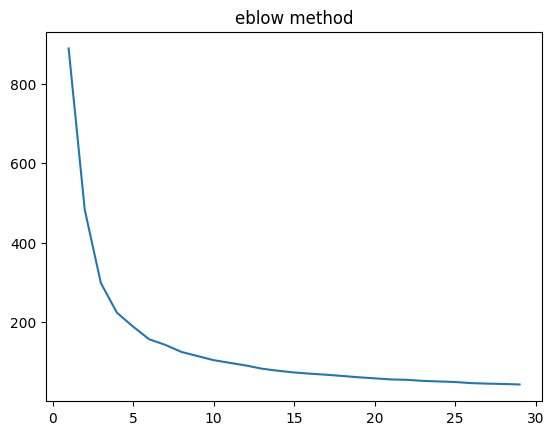

In [56]:
#elbow method to show optimize k_clusters
from sklearn.cluster import KMeans
l = []
n=30
for i in range(1, n):
    kmodel = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmodel.fit(X_train)
    l.append(kmodel.inertia_)
plt.plot(range(1, n), l)
plt.title("eblow method")
plt.show()

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=30, random_state=0)

kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=30, random_state=0)

In [51]:
kmeans.inertia_

42.04456790381022

In [52]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y_train == labels)

In [53]:
#accuracy for train set
c=format(correct_labels/float(y_train.size))
print(f'Accuracy score of train : {c}')

Accuracy score of train : 0.12907801418439716


In [54]:
k_test = KMeans(n_clusters=30, random_state=0)
k_test.fit(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=30, random_state=0)

In [55]:
# check how many of the samples were correctly labeled & evaluate accuracy for test set
labels = k_test.labels_
correct_label_test = sum(y_test== labels)
acc=format(correct_label_test/float(y_test.size))
print(f'Accuracy score of test : {acc}')

Accuracy score of test : 0.022340425531914895
